In [1]:
import pandas as pd
import sklearn as scikit
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data Exploration and Cleaning

In [2]:
cost_revenue_data = pd.read_csv("cost_revenue_dirty.csv")

In [3]:
# How many columns and rows are there?
cost_revenue_data.shape

(5391, 6)

In [4]:
cost_revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [5]:
cost_revenue_data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3424,2350,7/24/2009,Orphan,"$20,000,000","$78,769,428","$41,596,251"
4999,1307,9/25/2015,The Intern,"$40,000,000","$197,232,734","$75,764,672"
1125,862,8/14/1998,The Avengers,"$60,000,000","$48,585,416","$23,385,416"
561,3370,3/8/1990,Mo' Better Blues,"$10,000,000","$16,153,000","$16,153,000"
1552,439,12/22/2000,Cast Away,"$85,000,000","$427,230,516","$233,632,142"


In [6]:
# Are There any empty data?
cost_revenue_data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [7]:
# Are There any duplicate row
cost_revenue_data.duplicated().sum()

0

In [8]:
# Data Type of The column
cost_revenue_data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Convert Data Types of Money to Integer

In [9]:
# Converting the USD_Production_Budget
cost_revenue_data['USD_Production_Budget'] = cost_revenue_data.USD_Production_Budget.astype('str').str.replace("$","",regex=True)
cost_revenue_data['USD_Production_Budget'] = cost_revenue_data.USD_Production_Budget.astype('str').str.replace(",","",regex=True)
cost_revenue_data['USD_Production_Budget'] = cost_revenue_data.USD_Production_Budget.astype('int64')

In [10]:
# Converting the USD_Worldwide_Gross
cost_revenue_data['USD_Worldwide_Gross'] = cost_revenue_data.USD_Worldwide_Gross.astype('str').str.replace("$","",regex=True)
cost_revenue_data['USD_Worldwide_Gross'] = cost_revenue_data.USD_Worldwide_Gross.astype('str').str.replace(",","",regex=True)
cost_revenue_data['USD_Worldwide_Gross'] = cost_revenue_data.USD_Worldwide_Gross.astype('int64')

In [11]:
# Converting the USD_Domestic_Gross
cost_revenue_data['USD_Domestic_Gross'] = cost_revenue_data.USD_Domestic_Gross.astype('str').str.replace("$","",regex=True)
cost_revenue_data['USD_Domestic_Gross'] = cost_revenue_data.USD_Domestic_Gross.astype('str').str.replace(",","",regex=True)
cost_revenue_data['USD_Domestic_Gross'] = cost_revenue_data.USD_Domestic_Gross.astype('int64')

In [12]:
# Other Methods of transforming the Data
# chars_to_remove = [',','$']
# columns_to_clean = ['USD_Production_Budget','USD_Worldwide_Gross','USD_Domestic_Gross']
# for col in columns_to_clean:
    # for char in chars_to_remove:
    # # Replace each char with an empty string
    #   data[col] = data[col].astype(str).str.replace(char,"")
#    data[col] = pd.to_numeric(data[col])

In [13]:
# Test if the data is converted correctly
cost_revenue_data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget     int64
USD_Worldwide_Gross       int64
USD_Domestic_Gross        int64
dtype: object

### Convert The Release Date into Datetime

In [14]:
cost_revenue_data.Release_Date = pd.to_datetime(cost_revenue_data.Release_Date)

In [15]:
cost_revenue_data.Release_Date

0      1915-08-02
1      1916-05-09
2      1916-12-24
3      1920-09-17
4      1925-01-01
          ...    
5386   2018-10-08
5387   2018-12-18
5388   2020-12-31
5389   2020-12-31
5390   2020-12-31
Name: Release_Date, Length: 5391, dtype: datetime64[ns]

### What is The Cost and Revenue of the films in the data set

In [16]:
# What is the average cost of production
round(cost_revenue_data.USD_Production_Budget.mean(),2)

31113737.58

In [17]:
# what is the average worldwide and domestic revenue
print(f" Worldwide Revenue: ${round(cost_revenue_data.USD_Worldwide_Gross.mean(),2)}")
print(f" Domestic Revenue: ${round(cost_revenue_data.USD_Domestic_Gross.mean(),2)}")

 Worldwide Revenue: $88855421.96
 Domestic Revenue: $41235519.44


In [18]:
# The minimum revenue of the worldwide and domestic revenue
print(f"Lowest revenue Worldwide: ${round(cost_revenue_data.USD_Worldwide_Gross.min(),2)}")
print(f"Highest revenue Worldwide: ${round(cost_revenue_data.USD_Worldwide_Gross.max(),2)}")

print(f"Lowest revenue Domestic: ${round(cost_revenue_data.USD_Domestic_Gross.min(),2)}")
print(f"Highest revenue Domestic: ${round(cost_revenue_data.USD_Domestic_Gross.max(),2)}")

Lowest revenue Worldwide: $0
Highest revenue Worldwide: $2783918982
Lowest revenue Domestic: $0
Highest revenue Domestic: $936662225


In [19]:
# Are the bottom 25% of films actually profitable or do they lose money
revenue_df = cost_revenue_data.copy()
revenue_df['Revenue'] = ((revenue_df["USD_Worldwide_Gross"] + revenue_df['USD_Domestic_Gross'])- revenue_df['USD_Production_Budget'])

In [20]:
revenue_df.sort_values(['Rank'], ascending = False).head(25)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041,360982
5007,5390,2015-09-29,A Plague So Pleasant,1400,0,0,-1400
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0,-5000
2462,5388,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-2324
1209,5387,1999-02-04,Following,6000,240495,48482,282977
2157,5386,2004-01-01,The Mongol King,7000,900,900,-5200
2678,5385,2006-05-26,Cavite,7000,71644,70071,134715
2271,5384,2004-08-10,Primer,7000,841926,424760,1259686
668,5383,1993-02-26,El Mariachi,7000,2041928,2040920,4075848
4084,5382,2012-01-13,Newlyweds,9000,4584,4584,168


In [21]:
# What Are The Highest Production Budget and Highest Worldwide Gross of any film
print(f"Highest Budget Movie is ${revenue_df.USD_Production_Budget.max()} with the movie '{revenue_df.Movie_Title.iloc[revenue_df.USD_Production_Budget.idxmax()]}'")
print(f"Highest Worldwide Revenue Movie is ${revenue_df.USD_Worldwide_Gross.max()} with the movie '{revenue_df.Movie_Title.iloc[revenue_df.USD_Worldwide_Gross.idxmax()]}'")


Highest Budget Movie is $425000000 with the movie 'Avatar'
Highest Worldwide Revenue Movie is $2783918982 with the movie 'Avatar'


In [22]:
# How much revenue did the lowest and highest budget films make?
print(f"The Highest Budget is the film {revenue_df.Movie_Title.iloc[revenue_df.USD_Production_Budget.idxmax()]} with ${revenue_df.Revenue.iloc[revenue_df.USD_Production_Budget.idxmax()]} in revenue")
print(f"The Lowest Budget is the film {revenue_df.Movie_Title.iloc[revenue_df.USD_Production_Budget.idxmin()]} with ${revenue_df.Revenue.iloc[revenue_df.USD_Production_Budget.idxmin()]} in revenue")

The Highest Budget is the film Avatar with $3119426607 in revenue
The Lowest Budget is the film My Date With Drew with $360982 in revenue


In [23]:
# How many films grossed $0 domestically, What are the highest Budget Films that grossed nothing
print(f"There Are {revenue_df[revenue_df.USD_Domestic_Gross == 0]['Movie_Title'].count()} Movies that grossed $0 domestically")
print(f"The Highest Budget film that grossed nothing domestically is: {revenue_df.Movie_Title.iloc[revenue_df[revenue_df.USD_Domestic_Gross == 0]['USD_Production_Budget'].idxmax()]}")

There Are 512 Movies that grossed $0 domestically
The Highest Budget film that grossed nothing domestically is: Singularity


In [24]:
# How many films grossed $0 internationally, What are the highest Budget Films that grossed nothing
print(f"There Are {revenue_df[revenue_df.USD_Worldwide_Gross == 0]['Movie_Title'].count()} Movies that grossed $0 internationally")
print(f"The Highest Budget film that grossed nothing internationally is: {revenue_df.Movie_Title.iloc[revenue_df[revenue_df.USD_Worldwide_Gross == 0]['USD_Production_Budget'].idxmax()]}")

There Are 357 Movies that grossed $0 internationally
The Highest Budget film that grossed nothing internationally is: Singularity


In [25]:
revenue_df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07,9.897720e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07,2.035316e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-1.750000e+08
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06,-3.739165e+05
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07,2.425969e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07,1.093869e+08
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08,3.119427e+09


## Filtering Data with Multiple Conditions

In [26]:
# Films that has 0 Revenue Domestically but have revenue Internationally
international_releases = revenue_df.loc[(revenue_df.USD_Domestic_Gross == 0)&(revenue_df.USD_Worldwide_Gross != 0)]
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


In [27]:
# Using Query Function
revenue_df.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
71,4310,1956-02-16,Carousel,3380000,3220,0,-3376780
1579,5087,2001-02-11,Everything Put Together,500000,7890,0,-492110
1744,3695,2001-12-31,The Hole,7500000,10834406,0,3334406
2155,4236,2003-12-31,Nothing,4000000,63180,0,-3936820
2203,2513,2004-03-31,The Touch,20000000,5918742,0,-14081258
...,...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0,-34519911
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0,35807172
5360,4832,2017-07-03,Departure,1100000,27561,0,-1072439
5372,1856,2017-08-25,Ballerina,30000000,48048527,0,18048527


In [28]:
date_limit = '2018-5-1'
future_releases = revenue_df[revenue_df.Release_Date >= date_limit]
print(f"Number of Unreleased Movies: {len(future_releases)}")
future_releases

Number of Unreleased Movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


In [29]:
# Clean Data
clean_cost_revenue_data = revenue_df.drop(future_releases.index)

In [30]:
money_lost = clean_cost_revenue_data.loc[clean_cost_revenue_data.USD_Production_Budget > clean_cost_revenue_data.USD_Worldwide_Gross]
len(money_lost)/len(clean_cost_revenue_data)

0.37277117384843983

## Data visualization with Seaborn

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

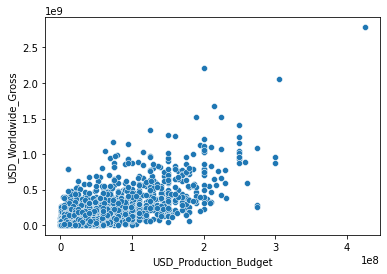

In [31]:
# Making a scatterplot of production budget and worldwide gross
sns.scatterplot(data = clean_cost_revenue_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')

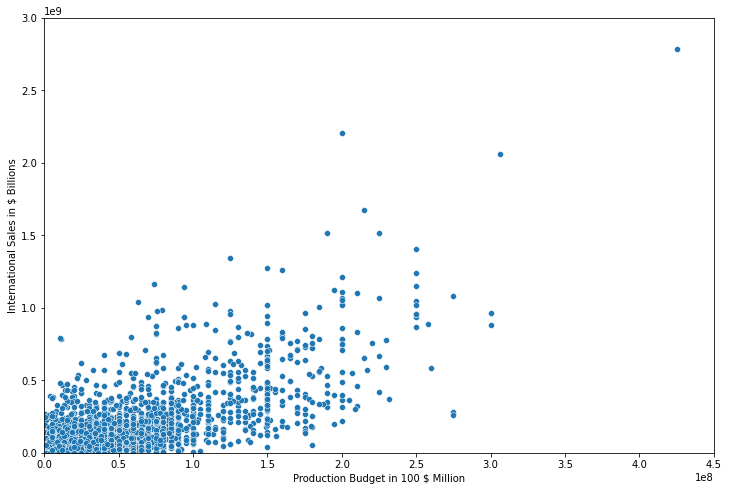

In [32]:
# Making a scatterplot of production budget and worldwide gross, combining it with matplotlib.pyplot
plt.figure(figsize=(12,8))

plot = sns.scatterplot(data = clean_cost_revenue_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')
plot.set(ylim=(0,3000000000), xlim=(0,450000000), xlabel='Production Budget in 100 $ Million', ylabel='International Sales in $ Billions')
plt.show()

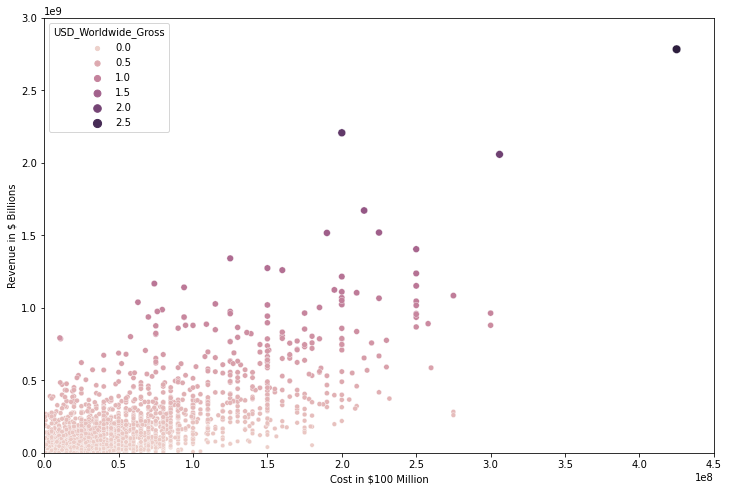

In [33]:
# Seaborn Bubblechart using hue and size
plt.figure(figsize=(12,8))

# Hue for Coloring, size for sizing
plot = sns.scatterplot(data = clean_cost_revenue_data,
                      x='USD_Production_Budget',
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross',
                      size='USD_Worldwide_Gross')

plot.set(ylim=(0,3000000000),
        xlim=(0,450000000),
        xlabel='Cost in $100 Million',
        ylabel='Revenue in $ Billions')

plt.show()

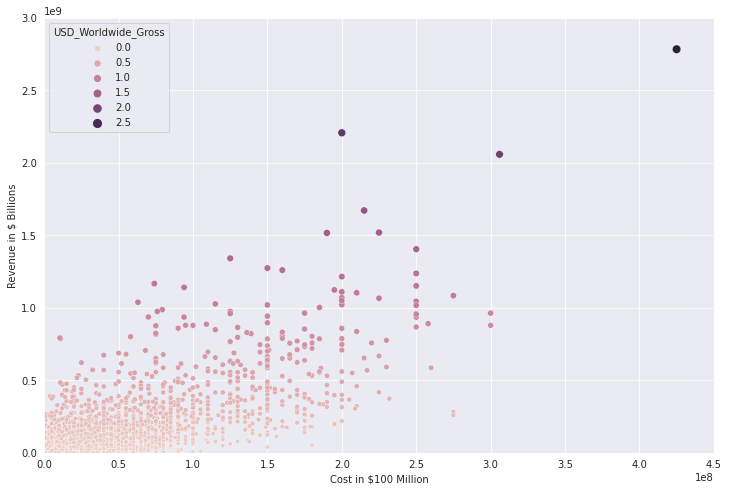

In [34]:
# Set Styling of a single chart using the with keyword
plt.figure(figsize=(12,8))

with sns.axes_style('darkgrid'):
    plot = sns.scatterplot(data = clean_cost_revenue_data,
                          x='USD_Production_Budget',
                          y='USD_Worldwide_Gross',
                          hue='USD_Worldwide_Gross',
                          size='USD_Worldwide_Gross')

    plot.set(ylim=(0,3000000000),
            xlim=(0,450000000),
            xlabel='Cost in $100 Million',
            ylabel='Revenue in $ Billions')

plt.show()

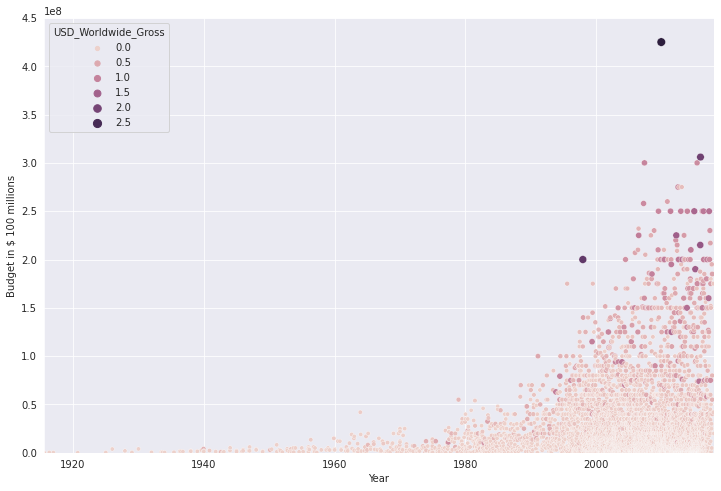

In [35]:
# Plotting many data
plt.figure(figsize=(12,8))

with sns.axes_style('darkgrid'):
    plot = sns.scatterplot(data = clean_cost_revenue_data,
                          x='Release_Date',
                          y='USD_Production_Budget',
                          hue='USD_Worldwide_Gross',
                          size='USD_Worldwide_Gross')

    plot.set(ylim=(0,450000000),
            xlim=(clean_cost_revenue_data.Release_Date.min(), clean_cost_revenue_data.Release_Date.max()),
            xlabel='Year',
            ylabel='Budget in $ 100 millions')

plt.show()

## Linear Regression with Seaborn

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

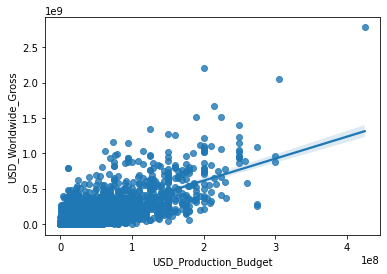

In [36]:
# we can make a linear regression plot using the sns.regplot
sns.regplot(data=clean_cost_revenue_data, x='USD_Production_Budget', y='USD_Worldwide_Gross')

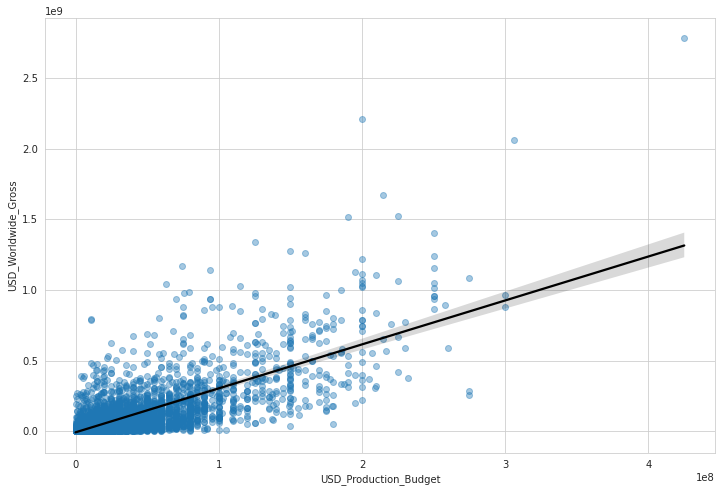

In [37]:
# we can also style the graph using matplotlib
plt.figure(figsize=(12,8))
with sns.axes_style("whitegrid"):
    sns.regplot(data=clean_cost_revenue_data, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
               scatter_kws = {'alpha':0.4},
               line_kws = {'color':'black'})

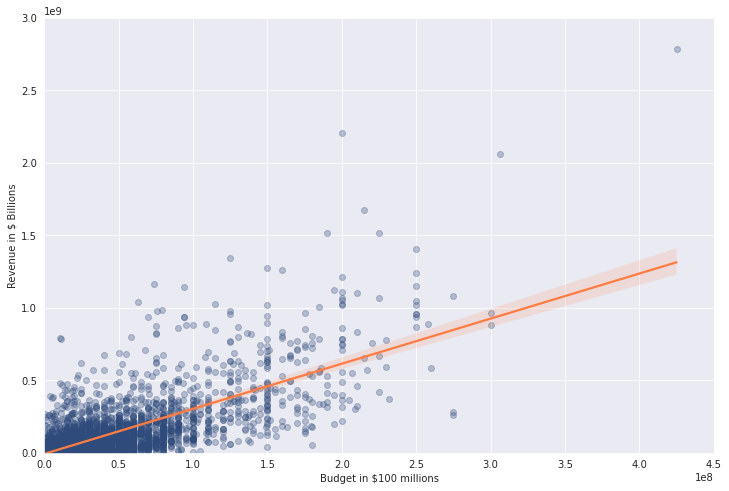

In [38]:
plt.figure(figsize=(12,8))
with sns.axes_style('darkgrid'):
    chart = sns.regplot(data = clean_cost_revenue_data,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       color='#2f4b7c',
                       scatter_kws = {'alpha': 0.3},
                       line_kws = {'color':'#ff7c43'})
    chart.set(ylim=(0,3000000000),
             xlim=(0,450000000),
             ylabel = 'Revenue in $ Billions',
             xlabel = 'Budget in $100 millions')

In [39]:
future_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Revenue
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0,-103000000
5385,366,2018-10-08,Amusement Park,100000000,0,0,-100000000
5386,2950,2018-10-08,Meg,15000000,0,0,-15000000
5387,126,2018-12-18,Aquaman,160000000,0,0,-160000000
5388,96,2020-12-31,Singularity,175000000,0,0,-175000000
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0,-50000000
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0,-20000000


## Making a Linear Regression Model using Scikit Learn

In [42]:
# Import Linear Regression
from sklearn.linear_model import LinearRegression

In [43]:
regression = LinearRegression()

In [44]:
# Variables in the linear regression
# Explanatory Variables
x = pd.DataFrame(clean_cost_revenue_data, columns=['USD_Production_Budget'])

# Dependent Variable
y = pd.DataFrame(clean_cost_revenue_data, columns=['USD_Worldwide_Gross'])

In [49]:
# Calculate the Regression
regression.fit(x,y)

LinearRegression()

In [50]:
# Result when the X is 0
regression.intercept_
# if the budget is 0, the profit is -7 million dollar
# a very bad model

array([-7572159.9172913])

In [51]:
# Result when the intercept is +1
regression.coef_
# every dollar in budget, raises the revenue by $3.11

array([[3.11043315]])

In [52]:
# Seeing the R squared, the bigger the r squared, the better the model
regression.score(x,y)

0.5570262562038151

In [53]:
# How much is the result if the budget is 350000000
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
print(f"revenue estimate is ${round(revenue_estimate,2)}")

revenue estimate is $1081079440.95
